In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from arch.unitroot import ADF, PhillipsPerron, KPSS
from statsmodels.graphics.tsaplots import plot_acf


In [3]:
df = pd.read_excel("/Users/neseuygun/Desktop/data/ons.xlsx")
df.rename(columns={"TP MK LON YTL":"Ons"}, inplace=True)
Y = df["Ons"]

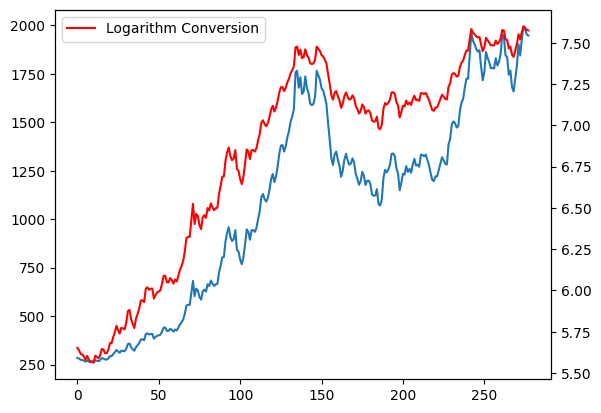

In [4]:
#1. Log Transforming
Ylog = np.log(Y)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Y, label="Original Series")
ax2.plot(Ylog, label="Logarithm Conversion", color="r")
plt.legend()
plt.show()

As we look at the above plot, we can see that logarithmic conversion could not be succefull to convert the series into stationarisation

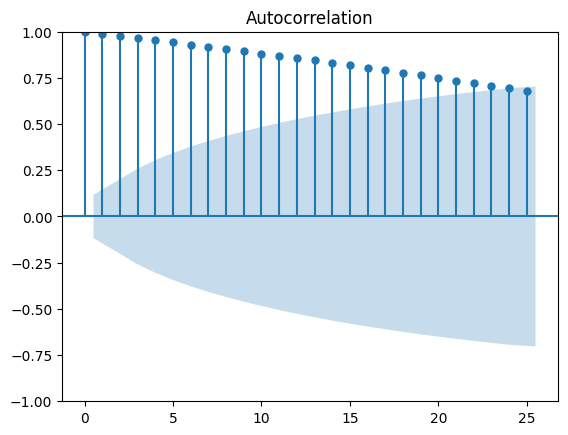

In [5]:
# let's look at the autocorrelation graph of the logarithmised series and again verify the series is not stationary
acf = plot_acf(Ylog)
plt.show()

In [6]:
# Let's check the unit root test for logarithmic conversion series and see there is a non stationary problem
from ipynb.fs.full.unit_root_test import unit_root_test
unit_root_test(Ylog)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tarih   278 non-null    object 
 1   Ons     278 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


,Test Name,Model Type,Lags,Test Statistics,P_Value
0,Augmented Dickey-Fuller,n,1,2.478150,0.997958
1,Augmented Dickey-Fuller,c,2,-1.666089,0.448664
2,Augmented Dickey-Fuller,ct,1,-1.317532,0.883525
3,KPSS Stationarity Test,c,10,2.202411,0.000100
4,KPSS Stationarity Test,ct,10,0.530059,0.000100
5,Phillips-Perron Test,n,16,2.567129,0.998557
6,Phillips-Perron Test,c,16,-1.497692,0.534653
7,Phillips-Perron Test,ct,16,-1.219892,0.906347


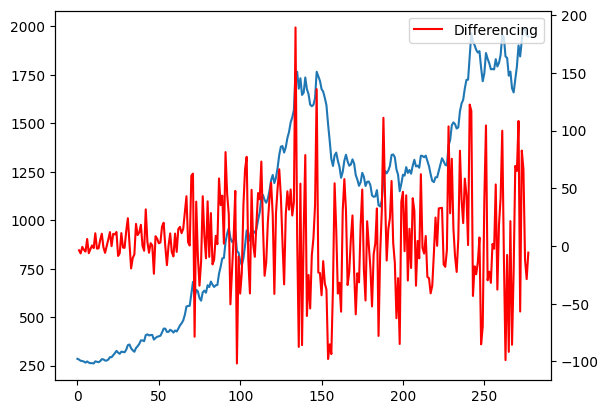

In [7]:
#2. Differencing Method
Ydiff1 = Y.diff().dropna()
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Y, label="Original Series")
ax2.plot(Ydiff1, label="Differencing", color="r")
plt.legend()
plt.show()


As you see in the above picture, we are able to make stationary the series

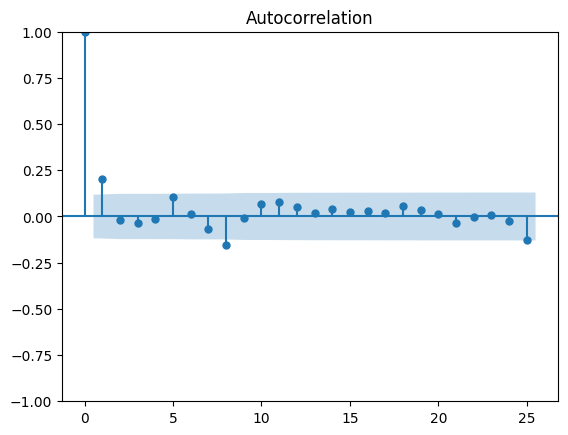

In [8]:
# let's look at the autocorrelation graph and see the series looks like stationary
acf = plot_acf(Ydiff1)
plt.show()

In [9]:
#Let's check the unit root test for differencing series and see we are able to handle with non stationary problem. 
# Here all unit root tests show us the series is able convert to stationary except KPSS test.
unit_root_test(Ydiff1)

,Test Name,Model Type,Lags,Test Statistics,P_Value
0,Augmented Dickey-Fuller,n,0,-13.259409,3.947897e-24
1,Augmented Dickey-Fuller,c,0,-13.457695,3.580347e-25
2,Augmented Dickey-Fuller,ct,0,-13.433700,4.101841e-21
3,KPSS Stationarity Test,c,1,0.084485,6.668111e-01
4,KPSS Stationarity Test,ct,1,0.086689,2.262646e-01
5,Phillips-Perron Test,n,16,-13.411138,2.224163e-24
6,Phillips-Perron Test,c,16,-13.364416,5.348528e-25
7,Phillips-Perron Test,ct,16,-13.340249,5.238598e-21
